In [1]:
# import dependencies
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# create file path and create DataFrame from the file
path_2 = "Resources/enter_2007.csv"
df = pd.read_csv(path_2,skiprows =1)

# view the total list of columns
pd.options.display.max_columns = 100
# print(pd.options.display.max_columns)

# view first 5 rows of the data
df.head()

,Geographic identifier code,Id2,Geographic area name,2007 NAICS code,Meaning of 2007 NAICS code,Gender code,Meaning of Gender code,Ethnicity code,Meaning of Ethnicity code,Race code,Meaning of Race code,Year,Number of firms with or without paid employees,"Sales, receipts, or value of shipments of firms with or without paid employees ($1,000)",Number of firms with paid employees,"Sales, receipts, or value of shipments of firms with paid employees ($1,000)",Number of paid employees for pay period including March 12,"Annual payroll ($1,000)",Number of firms without paid employees,"Sales, receipts, or value of shipments of firms without paid employees ($1,000)",Relative standard error of number of firms with or without paid employees (%),"Relative standard error of sales, receipts, or value of shipments of firms with or without paid employees (%)",Relative standard error of number of firms with paid employees (%),"Relative standard error of sales, receipts, or value of shipments of firms with paid employees (%)",Relative standard error of number of paid employees for pay period including March 12 (%),Relative standard error of annual payroll (%),Relative standard error of number of firms without paid employees (%),"Relative standard error of sales, receipts, or value of shipments of firms without paid employees (%)"
0,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,0,All firms,2007,382350,408238540,75272,394526507,1614098,55775009,307078,13712033,0,1,1,1,1,1,1,3
1,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,30,White,2007,305324,150719683,61769,138612841,815246,24977592,243555,12106842,1,1,1,1,2,1,1,4
2,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,40,Black or African American,2007,56712,2152418,2098,1258658,16724,372545,54614,893760,1,4,6,7,10,8,1,5
3,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,50,American Indian and Alaska Native,2007,3068,650084,422,553537,5254,138712,2646,96547,8,7,14,8,11,8,11,16
4,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,60,Asian,2007,6908,2620074,2447,2391748,17993,482413,4460,228326,5,7,4,7,6,5,7,11


In [3]:
# Rename the columns for ease of use in our code
df = df.rename(columns={"Geographic area name":"State","Meaning of 2007 NAICS code":"Sector", 
                        "Meaning of Gender code":"Gender owned", "Meaning of Race code": "Race",
                         "Number of firms with or without paid employees":"Number of Firms",
                         "Sales, receipts, or value of shipments of firms with or without paid employees ($1,000)":"Total Firm Sales",
                         "Number of firms with paid employees":"Paid Emp Firms", "Sales, receipts, or value of shipments of firms with paid employees ($1,000)":"Paid Emp Sales",
                         "Annual payroll ($1,000)":"Annual Payroll", "Number of firms without paid employees":"Unpaid Emp Firms",
                         "Sales, receipts, or value of shipments of firms without paid employees ($1,000)": "Unpaid Emp Sales", "Meaning of Ethnicity code":"Ethnicity",
                        "Number of paid employees for pay period including March 12":"Total Paid Emp"
                        })
df.head()

,Geographic identifier code,Id2,State,2007 NAICS code,Sector,Gender code,Gender owned,Ethnicity code,Ethnicity,Race code,Race,Year,Number of Firms,Total Firm Sales,Paid Emp Firms,Paid Emp Sales,Total Paid Emp,Annual Payroll,Unpaid Emp Firms,Unpaid Emp Sales,Relative standard error of number of firms with or without paid employees (%),"Relative standard error of sales, receipts, or value of shipments of firms with or without paid employees (%)",Relative standard error of number of firms with paid employees (%),"Relative standard error of sales, receipts, or value of shipments of firms with paid employees (%)",Relative standard error of number of paid employees for pay period including March 12 (%),Relative standard error of annual payroll (%),Relative standard error of number of firms without paid employees (%),"Relative standard error of sales, receipts, or value of shipments of firms without paid employees (%)"
0,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,0,All firms,2007,382350,408238540,75272,394526507,1614098,55775009,307078,13712033,0,1,1,1,1,1,1,3
1,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,30,White,2007,305324,150719683,61769,138612841,815246,24977592,243555,12106842,1,1,1,1,2,1,1,4
2,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,40,Black or African American,2007,56712,2152418,2098,1258658,16724,372545,54614,893760,1,4,6,7,10,8,1,5
3,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,50,American Indian and Alaska Native,2007,3068,650084,422,553537,5254,138712,2646,96547,8,7,14,8,11,8,11,16
4,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,60,Asian,2007,6908,2620074,2447,2391748,17993,482413,4460,228326,5,7,4,7,6,5,7,11


In [4]:
firms_revenue = df[['State', 'Total Firm Sales', 'Race','Gender owned', 'Ethnicity', 'Sector']]
firms_revenue

,State,Total Firm Sales,Race,Gender owned,Ethnicity,Sector
0,Alabama,408238540,All firms,All firms,All firms,Total for all sectors
1,Alabama,150719683,White,All firms,All firms,Total for all sectors
2,Alabama,2152418,Black or African American,All firms,All firms,Total for all sectors
3,Alabama,650084,American Indian and Alaska Native,All firms,All firms,Total for all sectors
4,Alabama,2620074,Asian,All firms,All firms,Total for all sectors
5,Alabama,1285410,Asian Indian,All firms,All firms,Total for all sectors
6,Alabama,306809,Chinese,All firms,All firms,Total for all sectors
7,Alabama,92155,Filipino,All firms,All firms,Total for all sectors
8,Alabama,49158,Japanese,All firms,All firms,Total for all sectors
9,Alabama,468435,Korean,All firms,All firms,Total for all sectors


In [5]:
firms_revenue1 = firms_revenue.replace({ 'Total Firm Sales' : 'S' },np.NaN)
firms_revenue1

,State,Total Firm Sales,Race,Gender owned,Ethnicity,Sector
0,Alabama,408238540,All firms,All firms,All firms,Total for all sectors
1,Alabama,150719683,White,All firms,All firms,Total for all sectors
2,Alabama,2152418,Black or African American,All firms,All firms,Total for all sectors
3,Alabama,650084,American Indian and Alaska Native,All firms,All firms,Total for all sectors
4,Alabama,2620074,Asian,All firms,All firms,Total for all sectors
5,Alabama,1285410,Asian Indian,All firms,All firms,Total for all sectors
6,Alabama,306809,Chinese,All firms,All firms,Total for all sectors
7,Alabama,92155,Filipino,All firms,All firms,Total for all sectors
8,Alabama,49158,Japanese,All firms,All firms,Total for all sectors
9,Alabama,468435,Korean,All firms,All firms,Total for all sectors


In [6]:
firms_revenue2 = firms_revenue1.loc[(firms_revenue1['Sector'] == 'Total for all sectors') & (firms_revenue1['Race'] == 'All firms') \
                                        & (firms_revenue1['Ethnicity'] == 'All firms') & (firms_revenue1['Gender owned'] == 'All firms')]


In [7]:
firms_revenue2['Total Firm Sales'] = firms_revenue2['Total Firm Sales'].astype('int64')
Top_ten_df = firms_revenue2.sort_values(by='Total Firm Sales', ascending=False)
Top_ten_firms = Top_ten_df.head(10)
Top_ten_firms

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,State,Total Firm Sales,Race,Gender owned,Ethnicity,Sector
11424,California,3765938643,All firms,All firms,All firms,Total for all sectors
122808,Texas,2621467877,All firms,All firms,All firms,Total for all sectors
91392,New York,2257362689,All firms,All firms,All firms,Total for all sectors
37128,Illinois,1473210665,All firms,All firms,All firms,Total for all sectors
25704,Florida,1467083782,All firms,All firms,All firms,Total for all sectors
108528,Pennsylvania,1175703198,All firms,All firms,All firms,Total for all sectors
99960,Ohio,1114157240,All firms,All firms,All firms,Total for all sectors
85680,New Jersey,1109995739,All firms,All firms,All firms,Total for all sectors
28560,Georgia,923749405,All firms,All firms,All firms,Total for all sectors
62832,Michigan,858127515,All firms,All firms,All firms,Total for all sectors


TypeError: ticklabel_format() got an unexpected keyword argument 'color'

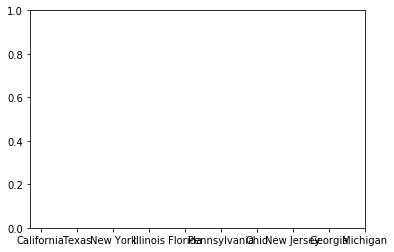

In [8]:
xpos = np.arange(len(Top_ten_firms['State']))
plt.xticks(xpos+0.3, Top_ten_firms['State'])
plt.ticklabel_format(style='plain', axis='y', color='black')

plt.ylabel('Total Firms Revenue (US$)', color='black')
# plt.xlabel('States')
plt.title('Revenue of firms per State', color='black')
plt.bar(xpos, Top_ten_firms['Total Firm Sales'], width=0.6,
        label='Total Firms Revenue', facecolor='coral')
legend = plt.legend()
plt.rcParams['figure.figsize']= (12,7)
# fig, ax = plt.subplots(facecolor='lightslategray')
plt.style.use('Solarize_Light2')
legend.get_frame().set_facecolor('grey')

In [ ]:
paid_unpaid = df[['State', 'Race','Gender owned', 'Ethnicity', 
                       'Sector', 'Paid Emp Sales', 'Unpaid Emp Sales']]
paid_unpaid.head()

In [ ]:
paid_unpaid1 = paid_unpaid.loc[(paid_unpaid['Sector'] == 'Total for all sectors') & (paid_unpaid['Race'] == 'All firms') & 
                                        (paid_unpaid['Ethnicity'] == 'All firms') & (paid_unpaid['Gender owned'] == 'All firms')]
# Plot_ten_states9

In [ ]:
paid_unpaid1['Unpaid Emp Sales'] = paid_unpaid1['Unpaid Emp Sales'].astype('int64')
paid_unpaid1['Paid Emp Sales'] = paid_unpaid1['Paid Emp Sales'].astype('int64')
Top_ten_emp_df = paid_unpaid1.sort_values(by=('Paid Emp Sales'), ascending=False)
# Top_ten_main = Top_ten_df.head(10)
# Top_ten_main
Top_ten_emp = Top_ten_emp_df.head(10)
Top_ten_emp

In [ ]:
xpos = np.arange(len(Top_ten_emp['State']))
plt.xticks(xpos+0.2, Top_ten_emp['State'])
plt.ticklabel_format(style='plain', axis='y', color='black')

plt.bar(xpos, Top_ten_emp['Paid Emp Sales'], width=0.4,
        label='Paid Employee Revenue', facecolor='coral', align='center')
plt.bar(xpos+0.4, Top_ten_emp['Unpaid Emp Sales'], width=0.4,
        label='Unpaid Employee Revenue', facecolor='lightskyblue', align='center')

plt.title('Revenue of Businesses(Paid vs Unpaid employment) per State', color='black')
plt.ylabel('Revenue (US$)', color='black')

legend = plt.legend()
plt.rcParams['figure.figsize']= (12,7)
plt.style.use('Solarize_Light2')
legend.get_frame().set_facecolor('grey')

In [ ]:
avg_income = df[['State', 'Race','Gender owned', 'Ethnicity', 
                       'Sector', 'Total Paid Emp', 'Annual Payroll']]
avg_income.head()

In [ ]:
avg_income = avg_income.replace({ 'Total Paid Emp' :
                                               ['a','b', 'c', 'e', 'f', 'g', 'h', 'i','S']},np.NaN)
avg_income = avg_income.replace({ 'Annual Payroll' : ['S','D'] },np.NaN)
avg_income = avg_income.replace({ 'Total Paid Emp' : np.NaN },0)
avg_income = avg_income.replace({ 'Annual Payroll' : np.NaN },0)


avg_income['Total Paid Emp'] = avg_income['Total Paid Emp'].astype('int64')
avg_income['Annual Payroll'] = avg_income['Annual Payroll'].astype('int64')

In [ ]:
avg_income['Avg Income'] = avg_income['Annual Payroll']/avg_income['Total Paid Emp']

In [ ]:
avg_income

In [ ]:
avg_income1 = avg_income.loc[(avg_income['Sector'] == 'Total for all sectors') & (avg_income['Race'] == 'All firms')
                                        & (avg_income['Ethnicity'] == 'All firms') & (avg_income['Gender owned'] == 'All firms')]


In [ ]:
Top_ten_avg_df = avg_income1.sort_values(by=('Avg Income'), ascending=False)
Top_ten_avg = Top_ten_avg_df.head(10)
Top_ten_avg

In [ ]:
xpos = np.arange(len(Top_ten_avg['State']))
plt.xticks(xpos+0.25, Top_ten_avg['State'])
plt.ticklabel_format(style='plain', axis='y', color='black')

plt.ylabel('Average Yearly Employee Income (US$, Thousands)', color='black')
# plt.xlabel('States')
plt.title('Annual Average Employee Income per State', color='black')
plt.bar(xpos, Top_ten_avg['Avg Income'], width=0.5,
        label='Average Income per state', facecolor='coral')
legend = plt.legend()
plt.rcParams['figure.figsize']= (13,8)
# fig, ax = plt.subplots(facecolor='lightslategray')
plt.style.use('Solarize_Light2')
legend.get_frame().set_facecolor('grey')

In [ ]:
Male_Female = ['Male-owned', 'Female-owned']
avg_income2 = avg_income.loc[(avg_income['Sector'] == 'Total for all sectors') & (avg_income['Race'] == 'All firms')
                                        & (avg_income['Ethnicity'] == 'All firms') & (avg_income['Gender owned'].isin(Male_Female))]


In [ ]:
StatesMF = ['District of Columbia', 'New York', 'Connecticut', 'Massachusetts', 'New Jersey',
            'California', 'Delaware', 'Maryland', 'Washington', 'Illinois']
Top_ten_avgMF = avg_income2.loc[(avg_income2['State'].isin(StatesMF))]


In [ ]:
Top_ten_avgMF_o = Top_ten_avgMF[['State', 'Gender owned', 'Avg Income']]
Top_ten_avgMF_n = Top_ten_avgMF_o.pivot(index = 'State', columns = 'Gender owned')
Top_ten_avgMF_n

In [ ]:
Top_ten_avgMF_m = pd.DataFrame(Top_ten_avgMF_n.to_records())

Top_ten_avgMF_m


In [ ]:
Top_ten_avgMF_m.columns = [hdr.replace("('Avg Income', '", "" ).replace("')", "") \
                           for hdr in Top_ten_avgMF_m.columns]

Top_ten_avgMF_m

In [ ]:
xpos = np.arange(len(Top_ten_avgMF_m['State']))
plt.xticks(xpos+0.2, Top_ten_avgMF_m['State'])
plt.ticklabel_format(style='plain', axis='y', color='black')

plt.bar(xpos, Top_ten_avgMF_m['Male-owned'],width=0.4,
        label='Male owned', facecolor='lightskyblue', align='center')
plt.bar(xpos+0.4, Top_ten_avgMF_m['Female-owned'], width=0.4,
        label='Female owned', facecolor='coral', align='center')

plt.title('Revenue of Busnesses(Paid vs Unpaid employment) per State', color='black')
plt.ylabel('Average Yearly Employee Income (US$, Thousands)', color='black')

legend = plt.legend()
plt.rcParams['figure.figsize']= (13,9)
plt.style.use('Solarize_Light2')
legend.get_frame().set_facecolor('grey')

In [9]:
#state, sector, gender owned, race,ethinicity
df_new=df[['State','Sector','Gender owned','Race', 'Ethnicity','Number of Firms']]
df_new.head()

,State,Sector,Gender owned,Race,Ethnicity,Number of Firms
0,Alabama,Total for all sectors,All firms,All firms,All firms,382350
1,Alabama,Total for all sectors,All firms,White,All firms,305324
2,Alabama,Total for all sectors,All firms,Black or African American,All firms,56712
3,Alabama,Total for all sectors,All firms,American Indian and Alaska Native,All firms,3068
4,Alabama,Total for all sectors,All firms,Asian,All firms,6908


In [10]:
df_b= df_new.loc[(df_new['Sector']=='Total for all sectors') &  (df_new['Race']=='All firms') &(df_new['Gender owned']=='All firms') & (df_new['Ethnicity']=='All firms')]
df_b['Number of Firms']= df_b['Number of Firms'].astype('int64')
df_b=df_b.sort_values('Number of Firms', ascending= False)
df_b


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,State,Sector,Gender owned,Race,Ethnicity,Number of Firms
11424,California,Total for all sectors,All firms,All firms,All firms,3425510
122808,Texas,Total for all sectors,All firms,All firms,All firms,2164852
25704,Florida,Total for all sectors,All firms,All firms,All firms,2009589
91392,New York,Total for all sectors,All firms,All firms,All firms,1956733
37128,Illinois,Total for all sectors,All firms,All firms,All firms,1123817
108528,Pennsylvania,Total for all sectors,All firms,All firms,All firms,981501
28560,Georgia,Total for all sectors,All firms,All firms,All firms,901105
99960,Ohio,Total for all sectors,All firms,All firms,All firms,897939
62832,Michigan,Total for all sectors,All firms,All firms,All firms,816972
94248,North Carolina,Total for all sectors,All firms,All firms,All firms,798791


In [12]:
len(df_new['Number of Firms'])

145656

In [56]:
df_d= df_new.loc[(df_new['Sector']!='Total for all sectors')  &  (df_new['Race']=='All firms') &(df_new['Gender owned']=='All firms') & (df_new['Ethnicity']=='All firms')]
#df_new['Number of Firms']= df_new['Number of Firms'].astype('int64')
#df_d=df_d.sort_values('Firms', ascending= False)
df_e=df_d.pivot_table(index=['State','Sector'], values =['Number of Firms'],aggfunc=max)
# #df_x=df_e.apply(np.max)
#df_e=df_e[~df_e[Sector'].isin(['Industries not classified'])]
#df_e['Sector']
df_f=df_e.drop(index=['Industries not classified','Mining, quarrying, and oil and gas extraction'], level=1)
df_f
# maxim =0
# for index,row in df_e.iterrows():
#     if  df_new['Firms'] > maxim:
#          df_new['Firms']=maxim
#     print(index, row['Firms'])

Number of Firms
State     Sector                                                            
Alabama   Accommodation and food services                               9531
          Administrative and support and waste management...           37938
          Agriculture, forestry, fishing and hunting(601)               5417
          Arts, entertainment, and recreation                          11721
          Construction                                                 61691
          Educational services                                          6883
          Finance and insurance(604)                                   12065
          Health care and social assistance                            26292
          Information                                                   3485
          Management of companies and enterprises                        437
          Manufacturing                                                 8848
          Other services (except public administration)(605)           55813
          Professional, scientific, and technical services             39944
          Real estate and rental and leasing                           32490
          Retail trade                                                 41627
          Transportation and warehousing(603)                          17992
          Utilities                                                      430
          Wholesale trade                                               9930
Alaska    Accommodation and food services                               3308
          Administrative and support and waste management...            4188
          Agriculture, forestry, fishing and hunting(601)               9481
          Arts, entertainment, and recreation                           3344
          Construction                                                  7576
          Educational services                                          1924
          Finance and insurance(604)                                    1143
          Health care and social assistance                             5913
          Information                                                    677
          Management of companies and enterprises                         82
          Manufacturing                                                 1651
          Other services (except public administration)(605)            5311
...                                                                      ...
Wisconsin Finance and insurance(604)                                   17481
          Health care and social assistance                            33461
          Information                                                   4954
          Management of companies and enterprises                        601
          Manufacturing                                                15702
          Other services (except public administration)(605)           47908
          Professional, scientific, and technical services             51417
          Real estate and rental and leasing                           36195
          Retail trade                                                 55457
          Transportation and warehousing(603)                          19241
          Utilities                                                      319
          Wholesale trade                                              12629
Wyoming   Accommodation and food services                               2087
          Administrative and support and waste management...            4041
          Agriculture, forestry, fishing and hunting(601)               1381
          Arts, entertainment, and recreation                           2820
          Construction                                                  8545
          Educational services                                          1138
          Finance and insurance(604)                                    1877
          Health care and social assistance              

In [67]:
df_f.loc["Alabama"].loc["Construction"]

Number of Firms    61691
Name: Construction, dtype: object

In [59]:

dfz = df_f[df_f['Number of Firms'] == df_f.groupby(['State'])['Number of Firms'].transform(max)]

dfz

,,Number of Firms
State,Sector,
Alabama,Wholesale trade,9930
Alaska,"Agriculture, forestry, fishing and hunting(601)",9481
Arizona,"Professional, scientific, and technical services",73321
Arkansas,Finance and insurance(604),8930
California,Accommodation and food services,93173
Colorado,"Professional, scientific, and technical services",93162
Connecticut,Accommodation and food services,9737
Delaware,"Professional, scientific, and technical services",9800
District of Columbia,Wholesale trade,571


In [ ]:
# Identify the top ten states where we have entrepreneurs and Identify the top ten sectors, 
#then group the sector by states and see if there is a story there.
# select the top 10 states by entre
df2=df.loc[df[''] & (df['Sector']=='Total for all sectors'),
#.groupby('Number of firms with or without paid employees')
#& df ['Number of firms with or without paid employees']& df['Geographic area name']
#&(df['Meaning of 2012 NAICS code']=="Total for all sectors")
df2

In [ ]:
# Identify the top ten states based on population and total number of revenue by states
states= ["California", "Texas", "Florida", "New York", "Pennsylvania", "Illinois", "Ohio", "Georgia", "North Carolina", "Michigan"]


In [ ]:
df.loc[df[:,"State"]]
df